In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**DATASET**

The dataset contains advertising spending across TV, radio, and newspaper channels, and the corresponding sales. Goal: predict sales based on ad spending.

In [3]:
data = pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")

Quickly check for missing values, understand feature distributions, and visualize relationships.

In [4]:
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [6]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


**Data Set Visualization**

The code below help to visualize linear relationships between each ad spend and sales. It helps us to see which features have strong or weak correlations (*Correlation measures the strength and direction of a linear relationship between two variables*).

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


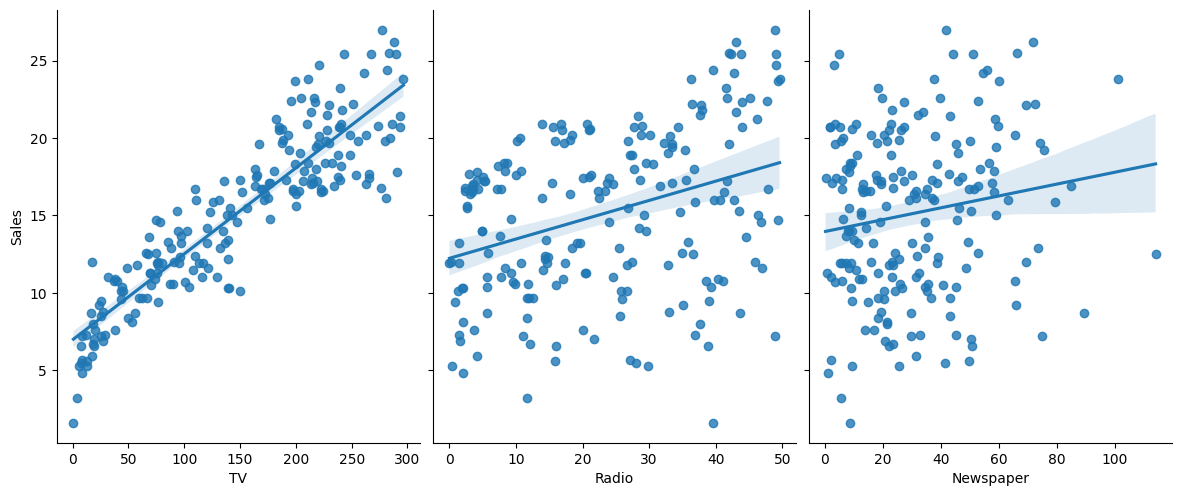

In [11]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8, kind='reg')
plt.show()

**Train and Test Split**

Splitting the data into 80 % percent for training and 20 % for testing.
Keep 20% data for testing to evaluate model performance on unseen data.

In [13]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training**

We create a `LinearRegression` model using scikit-learn and fit it on the training data.  

This model learns the **linear relationship** between the advertising features (`TV`, `Radio`, `Newspaper`) and the target variable (`Sales`).  

The `fit()` function finds the best-fit line (hyperplane in higher dimensions) by minimizing the sum of squared differences between the actual and predicted sales in the training data.  

After training, the model stores the **intercept** and **coefficients** for each feature, which we can later use to make predictions and understand feature impacts.


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Model Coefficients**

Coefficients show how much sales are expected to change with each advertising channel.

*Sales=b^0 + b^1 × TV + b^2 × Radio + b^3 × Newspaper*

Intercept (b₀): Base sales without any ad spending.

b₁: Sales increase per unit TV spend.

b₂: Sales increase per unit Radio spend.

b₃: Sales increase per unit Newspaper spend.

In [18]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 4.714126402214131
Coefficients: [0.05450927 0.10094536 0.00433665]


**Model Prediction**

In [19]:
y_pred = model.predict(X_test)

**Model Evaluation**


*MSE( Mean Square Error)* : how wrong the model is, numerically.

*R^2* : how well the model captures patterns.




In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 2.907756910271091
R2 Score: 0.9059011844150826


**Visualize predictions**

The red dashed line represents perfect predictions (where predicted = actual).

Points close to this line = good predictions.

Points far = larger errors.

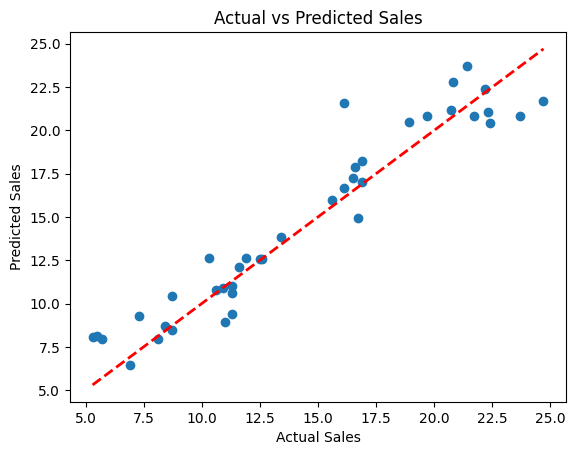

In [23]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()